# Merge SWOT and S2 ice mask

In [4]:
import pandas as pd
import numpy as np

import rasterio
import numpy as np
import matplotlib.pyplot as plt

### One file test

In [16]:
SWOT_df = pd.read_pickle("../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/filtered_SWOT_PIXC.pkl")
print(SWOT_df.shape)
# print(df.head())

# column names
print(SWOT_df.columns)

(4423064, 14)
Index(['longitude', 'latitude', 'phase_noise_std', 'waterfrac', 'geolocqual',
       'sig0', 'sig0_uncert', 'crosstrack', 'elevation', 'cycle_number',
       'pass_number', 'tile_number', 'time_granule_start', 'source_file'],
      dtype='object')


In [8]:
import geopandas as gpd
from shapely.geometry import Point

# Load the SWOT pickle file
SWOT_df = pd.read_pickle("../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/filtered_SWOT_PIXC.pkl")
# # check shape and columns
print(SWOT_df.shape)
print(SWOT_df.columns)

(4423064, 14)
Index(['longitude', 'latitude', 'phase_noise_std', 'waterfrac', 'geolocqual',
       'sig0', 'sig0_uncert', 'crosstrack', 'elevation', 'cycle_number',
       'pass_number', 'tile_number', 'time_granule_start', 'source_file'],
      dtype='object')


In [ ]:
# this block is taking forever because the SWOT_df is so large..

# # Create gdf with geometry from longitude/latitude
# gdf = gpd.GeoDataFrame(
#     SWOT_df,
#     geometry=gpd.points_from_xy(SWOT_df['longitude'], SWOT_df['latitude']),
#     crs="EPSG:4326"  # this is a close enough realization for now...
# )

# # UTM zone 6N
# gdf_reprojected = gdf.to_crs(epsg=32606)

# # Add reprojected coordinates to a new DataFrame
# SWOT_reprojected_df = SWOT_df.copy()
# SWOT_reprojected_df["x_utm"] = gdf_reprojected.geometry.x
# SWOT_reprojected_df["y_utm"] = gdf_reprojected.geometry.y

# print(SWOT_reprojected_df.head())

In [6]:
# ------------ load snow mask data ------------

# filepaths
filepath = "../../../../shared_space/SWOT_Aufeis/snow_mask/snow_mask_latlon/poly_01_20250719_snow.tif"
snowmask_src = rasterio.open(filepath)

# Read HLS band 1 data
snowmask_20250603 = snowmask_src.read(1)

In [1]:
# %%bash
# # gdalinfo to check metadata
# gdalinfo ../../../../shared_space/SWOT_Aufeis/snow_mask/poly_01_20250719_snow.tif

In [2]:
# %%bash
# gdalwarp -r bilinear -overwrite -t_srs '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs' ../../../../shared_space/SWOT_Aufeis/snow_mask/poly_01_20250719_snow.tif ../../../../shared_space/SWOT_Aufeis/snow_mask/snow_mask_latlon/poly_01_20250719_snow.tif  

Creating output file that is 1391P x 464L.
Processing ../../../../shared_space/SWOT_Aufeis/snow_mask/poly_01_20250719_snow.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


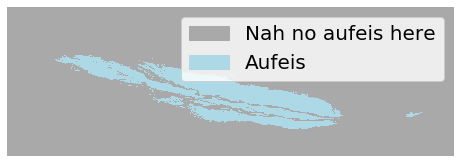

In [7]:
# plot the snow mask!

import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Define custom colormap: 0 = dark gray, 1 = light blue
cmap = mcolors.ListedColormap(['darkgray', 'lightblue'])
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(snowmask_20250603, cmap=cmap, norm=norm)
plt.axis('off')

# legend
legend_patches = [
    mpatches.Patch(color='darkgray', label='Nah no aufeis here'),
    mpatches.Patch(color='lightblue', label='Aufeis')
]
plt.legend(handles=legend_patches, loc='upper right', frameon=True, fontsize=20)

plt.show()